## Data Scientist Challenge - LATAM Airlines
### Instrucciones
En Advanced Analytics valoramos muchísimo el trabajo en equipo y la constante interacción entre los distintos roles que trabajan en
un producto basado en datos, como el Data Scientist, Machine Learning Engineering, Data Engineer, entre otros. Es por este motivo
que una habilidad esencial que buscamos a la hora de buscar nuevos integrantes es el manejo adecuado de git. **Este desafío
deberá ser entregado en la plataforma de git que más te acomode y que sea pública para que la podamos revisar**. Lo que
buscamos con esto es poder entender de mejor manera el desarrollo que generaste con tu código, cómo lo fuiste mejorando en el
tiempo y si tienes proyectos propios en este repositorio nos servirán para conocer mejor tu experiencia en base a tu propio.

### Problema

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de
Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo que
aterrizó o despegó de SCL.

### Importando librerías

* **pandas**
* **os**
* **matplotlib**
* **numpy**
* **seaborn**

In [70]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.getcwd()
import sys
import warnings

La siguiente celda se agrega  solo para eliminar las adevertencias (Warnings) del código

In [71]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Lectura de datos


* **Low_memory**:  Procesa internamente el archivo en fragmentos, lo que da como resultado un menor uso de la memoria durante el análisis.

* **Header** :  Los Número(s) de fila se  utilizan  como nombres de columna, y el inicio de los datos, la header=0 y los nombres de columna se infieren de la primera línea del archivo.

* **Parse_dates**: Función que se usará para convertir una secuencia de columnas de cadena en una matriz de instancias de fecha y hora.

In [72]:
df = pd.read_csv('data/dataset_SCL.csv', low_memory=False, header=0, parse_dates=True)

### Descripción de Variables


* **Fecha-I** : Fecha y hora programada del vuelo.
* **Vlo-I** : Número de vuelo programado.
* **Ori-I** : Código de ciudad de origen programado.
* **Des-I** : Código de ciudad de destino programado.
* **Emp-I** : Código aerolínea de vuelo programado.
* **Fecha-O** : Fecha y hora de operación del vuelo.
* **Vlo-O** : Número de vuelo de operación del vuelo.
* **Ori-O** : Código de ciudad de origen de operación
* **Des-O** : Código de ciudad de destino de operación.
* **Emp-O** : Código aerolínea de vuelo operado.
* **DIA** : Día del mes de operación del vuelo.
* **MES** : Número de mes de operación del vuelo.
* **AÑO** : Año de operación del vuelo.
* **DIANOM** : Día de la semana de operación del vuelo.
* **TIPOVUELO** : Tipo de vuelo, I =Internacional, N =Nacional.
* **OPERA** : Nombre de aerolínea que opera.
* **SIGLAORI** : Nombre ciudad origen.
* **SIGLADES** : Nombre ciudad destino.

##### Análisis Exploratorio y distribución de los datos

En primera instancia, una vez que se lee el archivo .csv, se guarda en un dataframe llamado df y se verifica el despliegue de todas las variables

In [73]:
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


A continuación se verifica los los tipos de variables con los que contamos en la información proporcionada

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


Verificamos con cuantos renglones y columnas tiene nuestro dataframe

In [75]:
df.shape

(68206, 18)

Así mismmo el nombre de las columnas que para nuestro análisis serán las variables

In [76]:
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES'],
      dtype='object')

Se verifica los valores nulos y como resultado se ve que solo hay un valor nulo

In [77]:
df.isna().any()


Fecha-I      False
Vlo-I        False
Ori-I        False
Des-I        False
Emp-I        False
Fecha-O      False
Vlo-O         True
Ori-O        False
Des-O        False
Emp-O        False
DIA          False
MES          False
AÑO          False
DIANOM       False
TIPOVUELO    False
OPERA        False
SIGLAORI     False
SIGLADES     False
dtype: bool

Se porcede a borrarlo

In [78]:
df.dropna()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


De esta manera, tenemos una data en principio limpia y lista para comenzar con el análisis exploratorio y ver como estan distribuidos nuestros datos en el dataframe

### Desafío

##### 1. ¿Cómo se distribuyen los datos? , ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

A continuación se realiza una análisis de distribución de los datos para la comprensión de los mismos, se utiliza la librería **seaborn**, para realizar la viuslaización, así mismo se enfatiza que no es la única librería pera realizarlo. Se tomarán algunas variables de importancia para comprender un poco más los datos

* **AÑO** : Año de operación del vuelo.
* **MES** : Número de mes de operación del vuelo.
* **OPERA** : Nombre de aerolínea que opera.
* **SIGLADES** : Nombre ciudad destino.
* **TIPOVUELO** : Tipo de vuelo, I =Internacional, N =Nacional.
* **DIANOM** : Día de la semana de operación del vuelo.

**Nota**: Las variables pueden tomarse en el orden que se requiera para su análsis

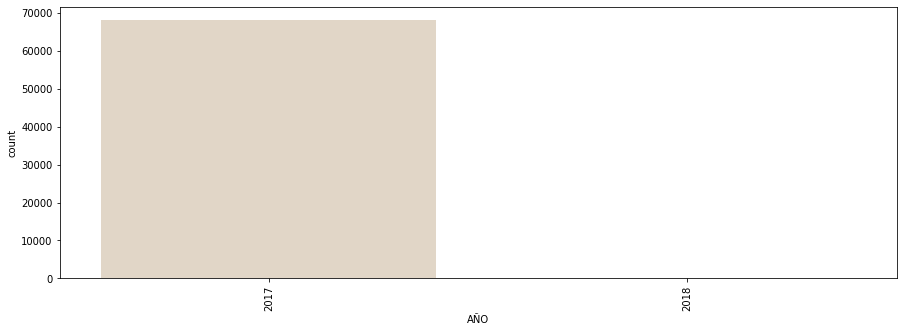

In [79]:
plt.figure(figsize=(15,5))
sns.countplot(x='AÑO', palette="ch:.25", data=df, color = 'g')
plt.xticks(rotation=90)
plt.show()

In [80]:
df.AÑO.value_counts()

2017    68204
2018        2
Name: AÑO, dtype: int64

En la figura y en el conteo anterior se observa que la cantidad de vuelos en el 2017 fueron mucho mayor que en el 2018, esto representa como un posible dato atípico, comparandolo con las cantidades que existen en ambos años

In [81]:
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


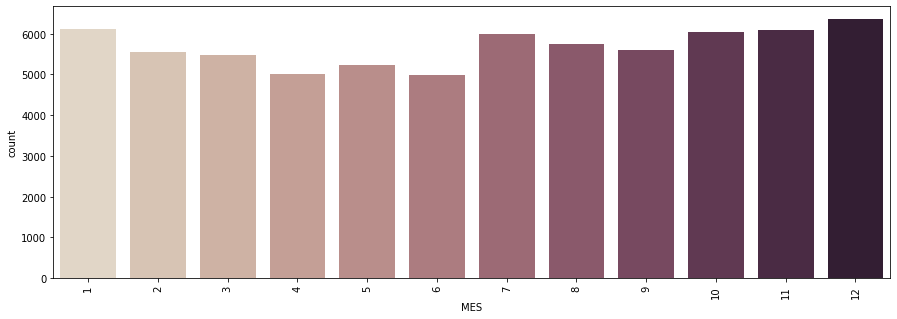

In [82]:
plt.figure(figsize=(15,5))
sns.countplot(x='MES', palette="ch:.25", data=df)
plt.xticks(rotation=90)
plt.show()

In [83]:
df.MES.value_counts()

12    6356
1     6108
11    6080
10    6032
7     5992
8     5744
9     5610
2     5561
3     5482
5     5240
4     5020
6     4981
Name: MES, dtype: int64

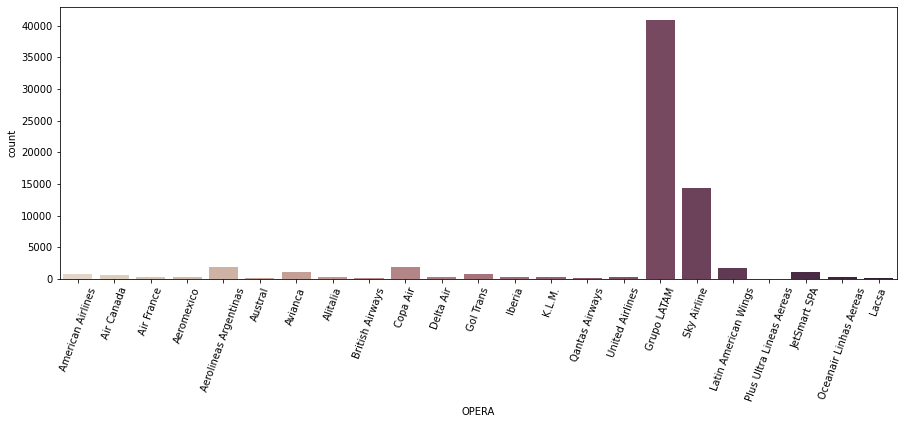

In [84]:
plt.figure(figsize=(15,5))
sns.countplot(x='OPERA', palette="ch:.25",  data=df)
plt.xticks(rotation=70)
plt.show()

In [85]:
df['OPERA'].value_counts()

Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64

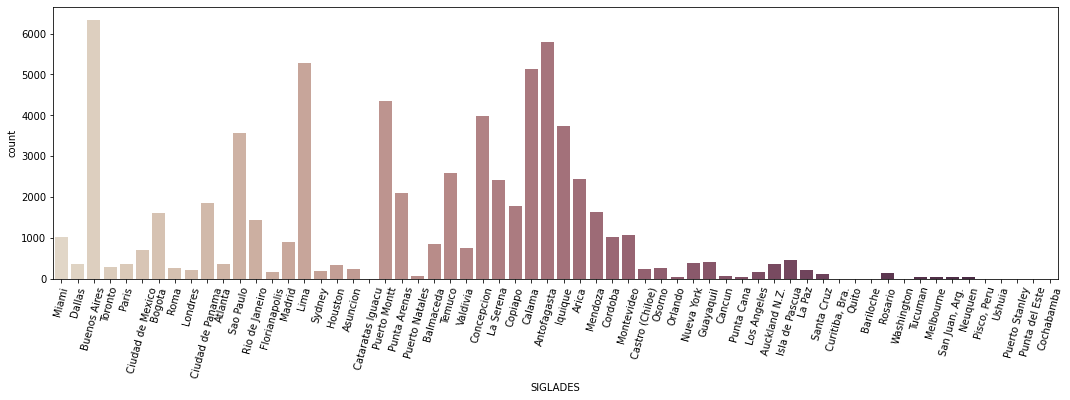

In [86]:
plt.figure(figsize=(18,5))
sns.countplot(x='SIGLADES', palette="ch:.25", data=df)
plt.xticks(rotation=75)
plt.show()

In [87]:
df['SIGLADES'].value_counts()

Buenos Aires      6335
Antofagasta       5786
Lima              5270
Calama            5146
Puerto Montt      4357
                  ... 
Quito                2
Washington           1
Pisco, Peru          1
Puerto Stanley       1
Cochabamba           1
Name: SIGLADES, Length: 62, dtype: int64

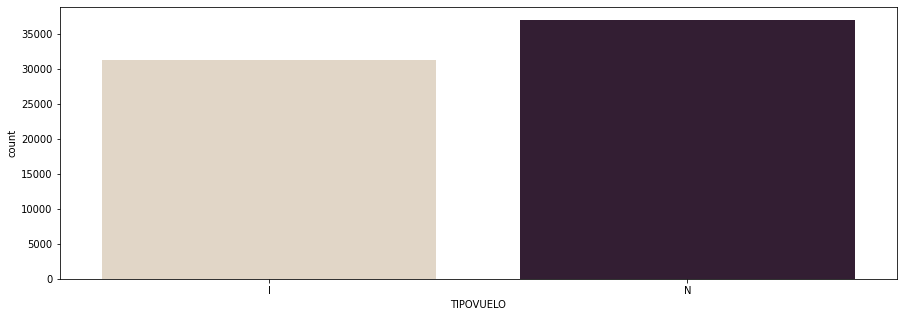

In [88]:
plt.figure(figsize=(15,5))
sns.countplot(x="TIPOVUELO", palette="ch:.25", data=df)
plt.show()

In [89]:
df['TIPOVUELO'].value_counts()

N    36966
I    31240
Name: TIPOVUELO, dtype: int64

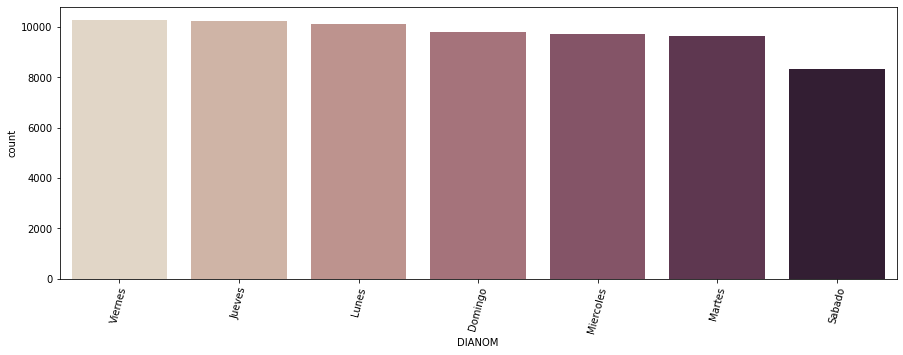

In [90]:
plt.figure(figsize=(15,5))
sns.countplot(x='DIANOM', palette="ch:.25", data=df, order = df['DIANOM'].value_counts().index)
plt.xticks(rotation=75)
plt.show()

In [91]:
df['DIANOM'].value_counts()

Viernes      10292
Jueves       10251
Lunes        10131
Domingo       9796
Miercoles     9722
Martes        9662
Sabado        8352
Name: DIANOM, dtype: int64

#### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
* **temporada_alta** : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
* **dif_min** : diferencia en minutos entre Fecha-O y Fecha-I .
* **atraso_15** : 1 si dif_min > 15, 0 si no.
* **periodo_dia** : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I

Para relaizar el paso de la variable **temporada_alta**, en el intervalo entre 15-Dic y 3-Mar se debe tener cuidado ya, se podría interpretar de la siguiente manera:
* 15 de Diciembre del 2017 al 3 Marzo del 2018, si se observa con anterioridad 2018 solo tiene 2 vuelos, por lo que se descarta
* Si se toma del 3 de Marzo del 2017 al 31 de Diciembre del 2017, se estaría incluyendo los intervalos de Julio y Septiembre y eso sumaría más datos al resultado (Este código comentado  representa lo que se describe  en este punto )
* Dado a que es solo 2017, se establece los intervalos del 15 de Diciembre al 31 del 2017 y después del 1 de Enero al 3 de Marzo del 2017.

**Nota**:  Aun así, se debe platicar con el cliente para disipar dudas

In [92]:
df['temporada_alta'] = np.where((df['Fecha-I'] >= '2017-12-15') & (df['Fecha-I'] <= '2017-12-31') |
                                (df['Fecha-I'] >= '2017-01-01') & (df['Fecha-I'] <= '2017-03-03') |
                                (df['Fecha-I'] >= '2017-07-15') & (df['Fecha-I'] <= '2017-07-31') |
                                (df['Fecha-I'] >= '2017-09-11') & (df['Fecha-I'] <= '2017-09-30') , 1, 0)

In [93]:
df['temporada_alta'].value_counts()

0    46174
1    22032
Name: temporada_alta, dtype: int64

In [94]:
#df['temporada_alta'] = np.where((df['Fecha-I'] >= '2017-03-03') & (df['Fecha-I'] <= '2017-12-31') |
#                                (df['Fecha-I'] >= '2017-07-15') & (df['Fecha-I'] <= '2017-07-31') |
#                                (df['Fecha-I'] >= '2017-09-11') & (df['Fecha-I'] <= '2017-09-30') , 1, 0)

In [95]:
#df['temporada_alta'].value_counts()

Para determinar la diferencia en minutos entre estas dos variables es necesario cambiarlas a variable **datatime**, antes de tratar de hacer la conversión, esto es debido a como se visualizo anteriormente en la información de las variables **Fecha-I** y **Fecha-O**, están como objeto



* **Fecha-I** : Fecha y hora programada del vuelo.
* **Fecha-O** : Fecha y hora de operación del vuelo.

In [96]:
df['Fecha-I'] = df['Fecha-I'].astype('datetime64[ns]')
df['Fecha-O'] = df['Fecha-O'].astype('datetime64[ns]')
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I'])/ pd.Timedelta(minutes=1)

In [97]:
df['atraso_15'] = np.where(df['dif_min'] > 15, 1, 0)

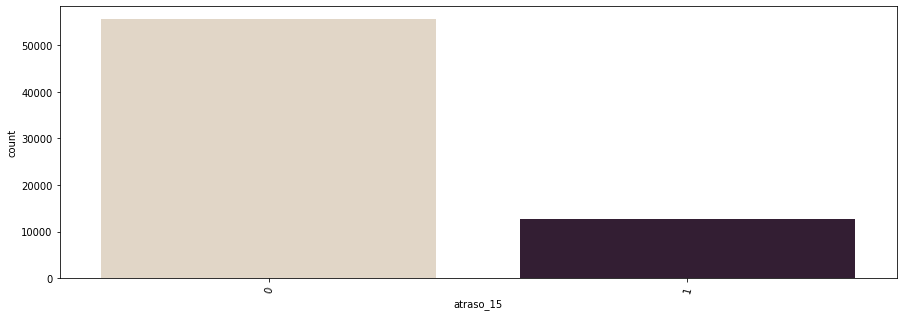

In [98]:
plt.figure(figsize=(15,5))
sns.countplot(x='atraso_15', palette="ch:.25", data=df)
plt.xticks(rotation=75)
plt.show()

In [99]:
df['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

Para establecer los periodos de día con las variantes **mañana**, **tarde** y **noche**, se establecen tres variables temporales, las cuales, se concatenan en una columna llamada **periodo_dia**

In [100]:
T1 = df.set_index('Fecha-I').between_time('05:00:00','11:59:00')
T1['periodo_dia'] = "mañana"


T2 = df.set_index('Fecha-I').between_time('12:00:00','18:59:00')
T2['periodo_dia'] = "tarde"

T3 = df.set_index('Fecha-I').between_time('19:00:00','04:59:00')
T3['periodo_dia'] = "noche"

In [101]:
df = pd.concat([T1,T2,T3], 0)


Se verifica que se encuentren añadidas las variables **temporada_alta** , **dif_min**, **atraso_15** y **periodo_dia** esten  con sus correctos resultados

**Nota**:  La verificación se puede hacer  teminando en cada celda, aunque el script final no lo llevará

In [102]:
df

,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
Fecha-I,,,,,,,,,,,,,,,,,,,,,
2017-01-01 10:35:00,1281,SCEL,SABE,ARG,2017-01-01 10:25:00,1281,SCEL,SABE,ARG,1,...,2017,Domingo,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,-10.0,0,mañana
2017-01-02 10:35:00,1281,SCEL,SABE,ARG,2017-01-02 10:37:00,1281,SCEL,SABE,ARG,2,...,2017,Lunes,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,2.0,0,mañana
2017-01-03 10:35:00,1281,SCEL,SABE,ARG,2017-01-03 10:33:00,1281,SCEL,SABE,ARG,3,...,2017,Martes,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,-2.0,0,mañana
2017-01-04 10:35:00,1281,SCEL,SABE,ARG,2017-01-04 11:06:00,1281,SCEL,SABE,ARG,4,...,2017,Miercoles,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,31.0,1,mañana
2017-01-05 10:35:00,1281,SCEL,SABE,ARG,2017-01-05 10:53:00,1281,SCEL,SABE,ARG,5,...,2017,Jueves,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,18.0,1,mañana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29 04:05:00,301,SCEL,SCCI,JAT,2017-12-29 04:00:00,301.0,SCEL,SCCI,JAT,29,...,2017,Viernes,N,JetSmart SPA,Santiago,Punta Arenas,1,-5.0,0,noche
2017-12-18 20:11:00,305,SCEL,SCCI,JAT,2017-12-18 20:21:00,305.0,SCEL,SCCI,JAT,18,...,2017,Lunes,N,JetSmart SPA,Santiago,Punta Arenas,1,10.0,0,noche
2017-12-23 04:05:00,305,SCEL,SCCI,JAT,2017-12-23 04:01:00,305.0,SCEL,SCCI,JAT,23,...,2017,Sabado,N,JetSmart SPA,Santiago,Punta Arenas,1,-4.0,0,noche


In [103]:
df['periodo_dia'].value_counts()

tarde     25506
mañana    25352
noche     17348
Name: periodo_dia, dtype: int64

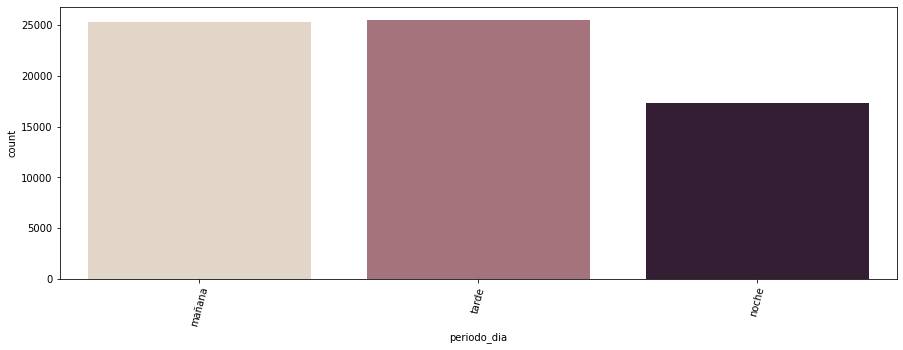

In [104]:
plt.figure(figsize=(15,5))
sns.countplot(x='periodo_dia', palette="ch:.25", data=df)
plt.xticks(rotation=75)
plt.show()

##### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?


* **Des-I** : Código de ciudad de destino programado.
* **OPERA** : Nombre de aerolínea que opera.
* **MES** : Número de mes de operación del vuelo.
* **AÑO** : Año de operación del vuelo.
* **DIANOM** : Día de la semana de operación del vuelo.
* **temporada**: Se toma la variable ya creada compo **temporada_alta**
* **TIPOVUELO** : Tipo de vuelo, I =Internacional, N =Nacional.

Para la variable t**emporada**, se tomará la columna ya creada (**temporada_alta**), tomando en cuenta que esta varible puede ser actualizada con otras fechas, mismas que serán valoradas para determinar si la temporada es alta o baja. 

Así mismo se genera una nueva variable llamda **atraso_gral** donde se concideran desde los 2 min ya un atraso en el vuelo, esta variable es a concidear ya que se puede utilizar la variable de los retrasos de **atraso_15**, de esta manera se procede a analizar como esta la tasa de atrasos por las variables ya indicadas

In [105]:
#df['atraso_gral'] = np.where(df['dif_min'] > 2, 1, 0)

In [106]:
pd.DataFrame(df.groupby(by=['Des-I'])['atraso_15'].mean())


,atraso_15
Des-I,
CYYZ,0.314488
EGLL,0.141463
EGYP,1.000000
KATL,0.058659
KDFW,0.070028
...,...
SPSO,0.000000
SULS,0.166667
SUMU,0.206379


In [107]:
pd.DataFrame(df.groupby(by=['Des-I'])['atraso_15'].mean().describe())

,atraso_15
count,64.000000
mean,0.253194
std,0.234241
min,0.000000
25%,0.135833
50%,0.190316
75%,0.269350
max,1.000000


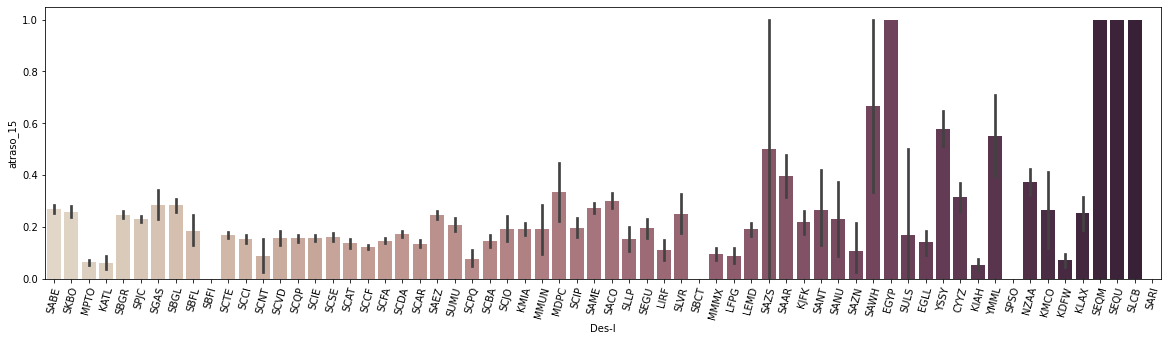

In [108]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'Des-I', y = 'atraso_15', palette="ch:.25", data = df)
plt.xticks(rotation = 75)
plt.show() 

In [109]:
pd.DataFrame(df.groupby(by=['OPERA'])['atraso_15'].mean())

,atraso_15
OPERA,
Aerolineas Argentinas,0.240123
Aeromexico,0.028490
Air Canada,0.456637
Air France,0.083799
Alitalia,0.111969
American Airlines,0.067371
Austral,0.202703
Avianca,0.265625
British Airways,0.141463


In [110]:
pd.DataFrame(df.groupby(by=['OPERA'])['atraso_15'].mean().describe())

,atraso_15
count,23.000000
mean,0.205088
std,0.167696
min,0.028490
25%,0.083732
50%,0.154122
75%,0.252874
max,0.612245


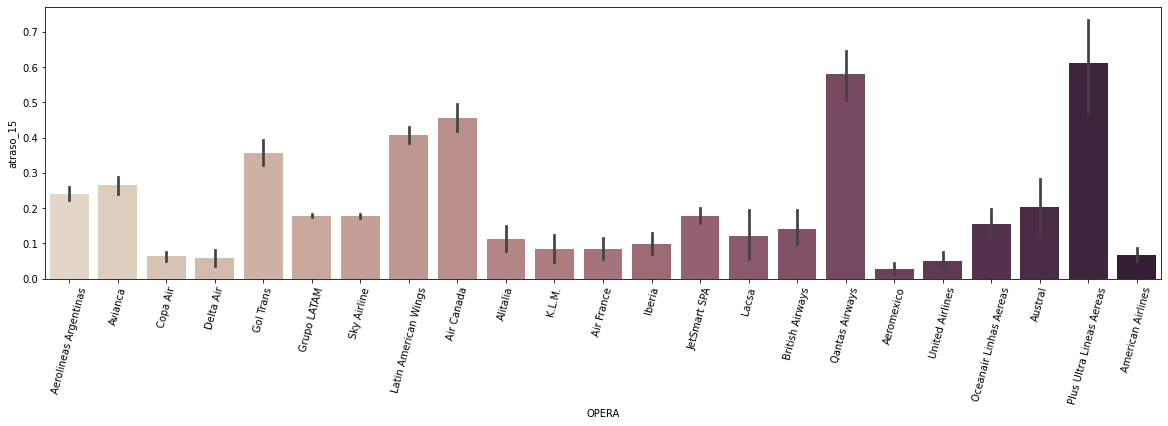

In [111]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'OPERA', y = 'atraso_15', palette="ch:.25", data = df)
plt.xticks(rotation = 75)
plt.show() 

In [112]:
pd.DataFrame(df.groupby(by=['MES'])['atraso_15'].mean())

,atraso_15
MES,
1,0.160118
2,0.151591
3,0.115104
4,0.116534
5,0.157824
6,0.171050
7,0.293391
8,0.173398
9,0.172371


In [113]:
pd.DataFrame(df.groupby(by=['MES'])['atraso_15'].mean().describe())

,atraso_15
count,12.000000
mean,0.182386
std,0.052917
min,0.115104
25%,0.156266
50%,0.171710
75%,0.204393
max,0.293391


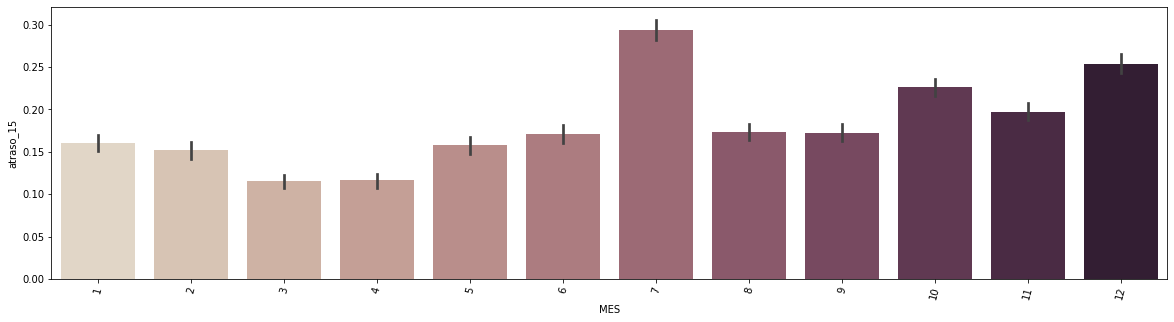

In [114]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'MES', y = 'atraso_15', palette="ch:.25", data = df)
plt.xticks(rotation = 75)
plt.show() 

In [115]:
pd.DataFrame(df.groupby(by=['DIA'])['atraso_15'].mean())

,atraso_15
DIA,
1,0.148551
2,0.158345
3,0.176134
4,0.189616
5,0.174476
6,0.197363
7,0.158127
8,0.162223
9,0.178267


In [116]:
pd.DataFrame(df.groupby(by=['DIA'])['atraso_15'].mean().describe())

,atraso_15
count,31.000000
mean,0.184391
std,0.022429
min,0.148551
25%,0.168337
50%,0.181778
75%,0.195656
max,0.242966


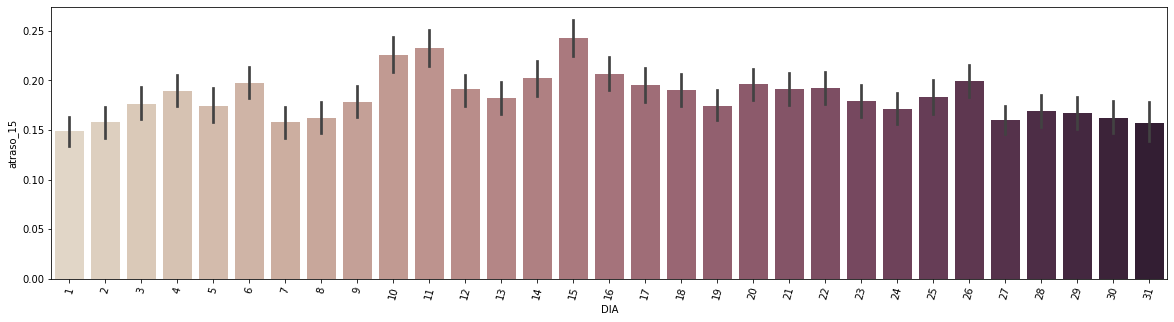

In [117]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'DIA', y = 'atraso_15',palette="ch:.25", data = df)
plt.xticks(rotation = 75)
plt.show() 

In [118]:
pd.DataFrame(df.groupby(by=['temporada_alta'])['atraso_15'].mean())

,atraso_15
temporada_alta,
0,0.179300
1,0.196759


In [119]:
pd.DataFrame(df.groupby(by=['temporada_alta'])['atraso_15'].mean().describe())

,atraso_15
count,2.000000
mean,0.188030
std,0.012346
min,0.179300
25%,0.183665
50%,0.188030
75%,0.192394
max,0.196759


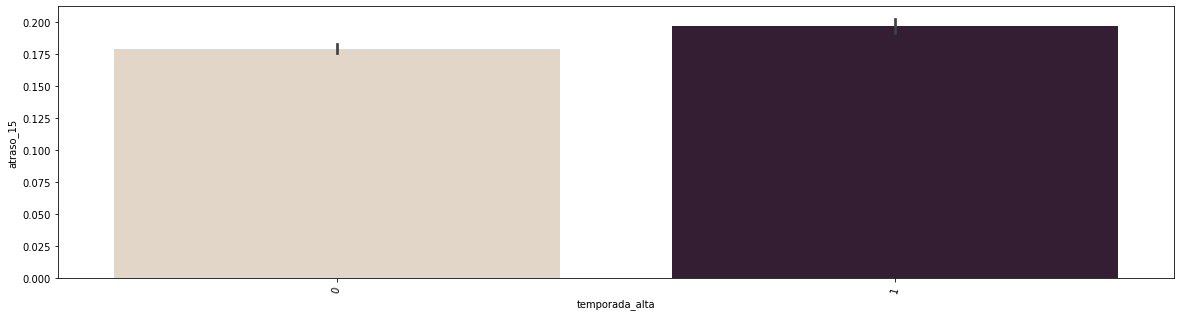

In [120]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'temporada_alta', y = 'atraso_15', palette="ch:.25", data = df)
plt.xticks(rotation = 75)
plt.show() 

In [121]:
pd.DataFrame(df.groupby(by=['TIPOVUELO'])['atraso_15'].mean())

,atraso_15
TIPOVUELO,
I,0.225608
N,0.150571


In [122]:
pd.DataFrame(df.groupby(by=['TIPOVUELO'])['atraso_15'].mean().describe())

,atraso_15
count,2.000000
mean,0.188089
std,0.053059
min,0.150571
25%,0.169330
50%,0.188089
75%,0.206849
max,0.225608


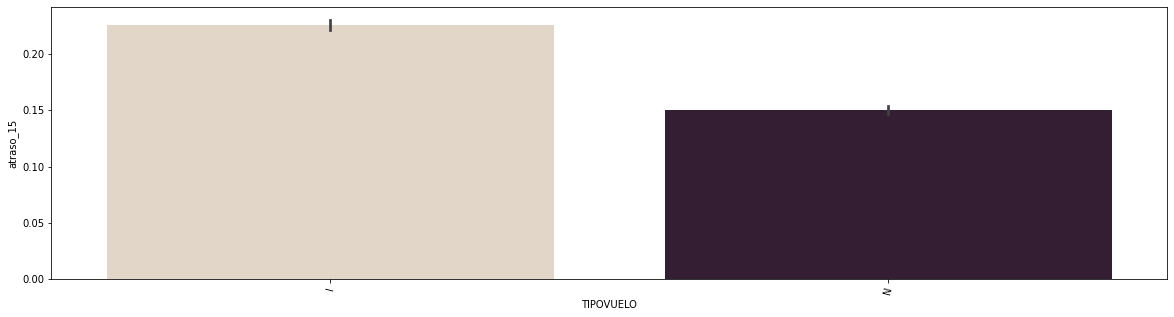

In [123]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'TIPOVUELO', y = 'atraso_15',palette="ch:.25", data = df)
plt.xticks(rotation = 75)
plt.show() 

Con respecto a **¿Qué variables esperarías que más influyeran en predecir atrasos?**, las variables se pueden clasificar por diferentes problematicas que acontinuación trataré de describir:

* **Aerolínea + Turnaround Local**: La causa del retraso  se debe a las circunstancias dentro del control local. Esto incluye las líneas aéreas u otras partes, tales como operadores de tierra que participan en el proceso de turnaround (por ejemplo, problemas de mantenimiento o de la tripulación, de limpieza de la aeronave, del equipaje de carga, abastecimiento de combustible, etc.). 
* **Tiempo Extremo** : Condiciones meteorológicas significativas (reales o previstas) que a juicio de la compañía, retrasa o impide la realización de un vuelo, como por ejemplo,  la formación de hielo, tornados, tormentas de nieve, o huracanes. En los EE.UU., esta categoría es utilizada por las compañías aéreas para eventos muy raros como los huracanes y no es útil para entender el día a día de los impactos del clima. Para realmente ver la importancia que tienen los retrasos debido a condiciones no extremas en el tiempo de EEUU se ha de observar la clasificación de retrasos por causas en el sistema ATM, que es donde éstas se conciben. 
* **Aeronaves que llegan tarde (o retraso reaccionario)**: Retraso a causa de la llegada tardía de la anterior aeronave, haciendo que el  vuelo continuo a éste se retrase sin poder recuperar el tiempo durante la fase de turnaround en el aeropuerto. 
* **Seguridad** : Retrasos causados por la evacuación de una terminal o zona determinada, re-acceso a las aeronaves debido a fallo de seguridad, equipos de control que no funcionan, y / u otras causas relacionadas con la seguridad.

* **Sistema ATM(retrasos ATFM / NAS)**: Los retrasos atribuibles a ATM se refieren a una amplia gama de condiciones, como las condiciones no extremas del clima, las operaciones aeroportuarias, el volumen de tráfico pesado, Control del Tráfico Aéreo(ATC). 

Por ejemplo: A continuación se muestra en la siguiente imagen todos los factores que puede influrir para que exista retardos en los vuelos, misma imagen que se  adquirión de el platica llamada **"Cómo LATAM AIRLINES creó un Programa de DS/ MLOps Durante la Crisis"**

<div>
<p style = 'text-align:center;'>
<img src="figuras/figura1.jpg" width="800" height="450">
</p>
</div>

#####  4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [125]:
X = df.drop(['Vlo-I','Ori-I','Des-I','Emp-I','Fecha-O','Vlo-O','Ori-O','Des-O','Emp-O', 'atraso_15'], 1)
y = df[['atraso_15']]

In [126]:
X

,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,periodo_dia
Fecha-I,,,,,,,,,,,
2017-01-01 10:35:00,1,1,2017,Domingo,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,-10.0,mañana
2017-01-02 10:35:00,2,1,2017,Lunes,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,2.0,mañana
2017-01-03 10:35:00,3,1,2017,Martes,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,-2.0,mañana
2017-01-04 10:35:00,4,1,2017,Miercoles,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,31.0,mañana
2017-01-05 10:35:00,5,1,2017,Jueves,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,18.0,mañana
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29 04:05:00,29,12,2017,Viernes,N,JetSmart SPA,Santiago,Punta Arenas,1,-5.0,noche
2017-12-18 20:11:00,18,12,2017,Lunes,N,JetSmart SPA,Santiago,Punta Arenas,1,10.0,noche
2017-12-23 04:05:00,23,12,2017,Sabado,N,JetSmart SPA,Santiago,Punta Arenas,1,-4.0,noche


In [127]:
#Al momento de tratar de meter un algoritmo en X e Y, ocurre un problema puesto que sus atributos estan en String y para
#predecir con algoritmos se necesita SOLO numeros, es por ello que se hace todo este proceso

X = X.to_numpy()
y = y.to_numpy()
            
#Esto convierte de String a numero
labelencoder = LabelEncoder()
        
#for X: como X tienes muchas columnas, se hace la tranformacion por cada columna
X[:,0] = labelencoder.fit_transform(X[:, 0])
X[:,1] = labelencoder.fit_transform(X[:, 1])
X[:,2] = labelencoder.fit_transform(X[:, 2])
X[:,3] = labelencoder.fit_transform(X[:, 3])
X[:,4] = labelencoder.fit_transform(X[:, 4])
X[:,5] = labelencoder.fit_transform(X[:, 5])
X[:,6] = labelencoder.fit_transform(X[:, 6])
X[:,7] = labelencoder.fit_transform(X[:, 7])
X[:,8] = labelencoder.fit_transform(X[:, 8])
X[:,9] = labelencoder.fit_transform(X[:, 9])
X[:,10] = labelencoder.fit_transform(X[:, 10])
#X[:,11] = labelencoder.fit_transform(X[:, 11])
#X[:,12] = labelencoder.fit_transform(X[:, 12])
#X[:,13] = labelencoder.fit_transform(X[:, 13])
            
#for y: como y solo tiene una columna, con una es suficiente
y = labelencoder.fit_transform(y)

In [128]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,
                                   test_size=0.20, random_state=None)

In [129]:
print("X_train %: ", len(X_train)/len(X))
print("X_test %: ", len(X_test)/len(X))

X_train %:  0.7999882708266135
X_test %:  0.2000117291733865


In [130]:
#X_train

In [131]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

**RMSE** es una forma útil de ver qué tan bien un modelo puede ajustarse a un conjunto de datos. Cuanto mayor sea el **RMSE**, mayor será la diferencia entre los valores predichos y observados, lo que significa que peor se ajusta un modelo a los datos. Por el contrario, cuanto más pequeño sea el **RMSE**, mejor podrá un modelo ajustar los datos.

In [132]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 2))

RMSE:  0.27


In [136]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [137]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 2))

RMSE:  0.0


<Figure size 1080x576 with 0 Axes>

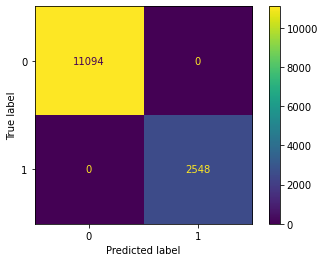

In [139]:
plt.figure(figsize=(15,8))
plot_confusion_matrix(logreg, X_test, y_test)  
plt.show()

In [140]:
ranfor = RandomForestRegressor()
ranfor.fit(X_train, y_train)
y_pred = ranfor.predict(X_test)

In [141]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 2))

RMSE:  0.0
